<a href="https://colab.research.google.com/github/ArmanZaki/Week-1/blob/main/week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving WQuality_River-Data-2022.pdf to WQuality_River-Data-2022.pdf
Uploaded file: WQuality_River-Data-2022.pdf
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.2/313.2 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.2 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/camelot/parsers/base.py:238: UserWarning: No tables found in table area (125.86000000000001, 377.766, 785.2399999999999, 547.1909748743718)
  cols, rows, v_s, h_s = self._generate_columns_and_rows(bbox, user_cols)


Total tables extracted: 273
✅ Saved as rivers_water.xlsx
✅ First table saved as rivers_water.csv
Shape of dataset: (32, 4)

Column Names:
 ['Unnamed: 0', 0, 1, 2]

First 5 Rows:
    Unnamed: 0      0                              1      2
0           0    NaN                            NaN  INDEX
1           1  Table                            NaN  Table
2           2    No.                            NaN    NaN
3           3      1    WATER QUALITY OF RIVER BEAS    NaN
4           4      2  WATER QUALITY OF RIVER SUTLEJ    NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  32 non-null     int64 
 1   0           12 non-null     object
 2   1           22 non-null     object
 3   2           2 non-null      object
dtypes: int64(1), object(3)
memory usage: 1.1+ KB
✅ Data cleaned. New shape: (32, 2)


/tmp/ipython-input-2049365512.py:63: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="ffill")


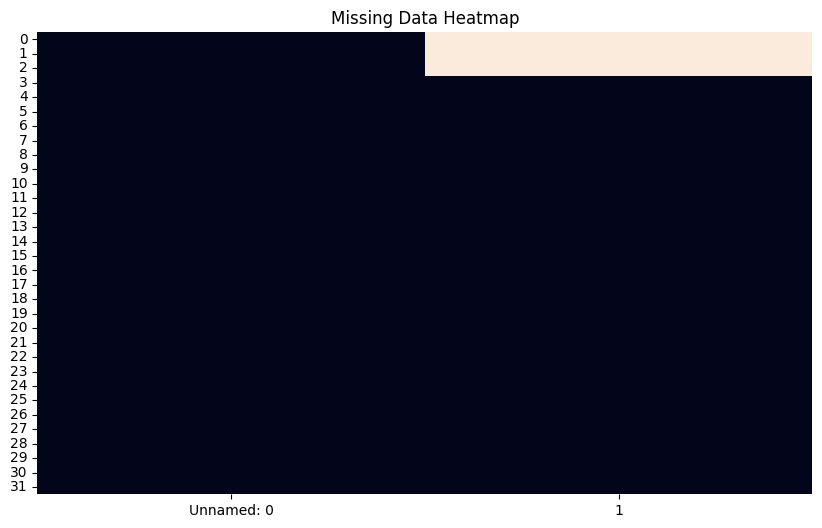


Summary Statistics:
        Unnamed: 0
count   32.000000
mean    15.500000
std      9.380832
min      0.000000
25%      7.750000
50%     15.500000
75%     23.250000
max     31.000000


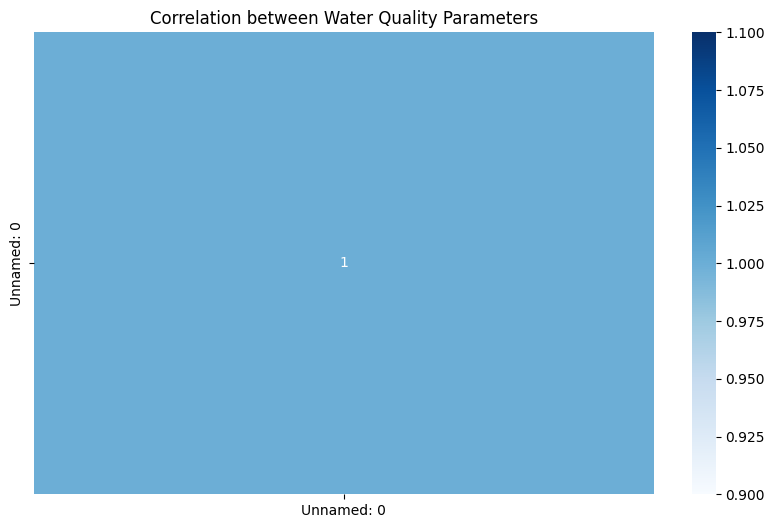

✅ Cleaned dataset saved as cleaned_data.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
# ============================================================
# STEP 1: Upload the PDF File (CPCB River Water Quality 2022)
# ============================================================
from google.colab import files
uploaded = files.upload()

pdf_path = list(uploaded.keys())[0]
print("Uploaded file:", pdf_path)


# ==============================
# STEP 2: Install Dependencies
# ==============================
!pip install camelot-py[cv] ghostscript


# ======================================================
# STEP 3: Extract Tables from PDF and Export to Excel
# =======================================================
import camelot

tables = camelot.read_pdf(pdf_path, pages="all", flavor="stream")
print("Total tables extracted:", len(tables))

# Export all tables into a single Excel file
tables.export("rivers_water.xlsx", f="excel")
print("✅ Saved as rivers_water.xlsx")

tables[0].to_csv("rivers_water.csv")
print("✅ First table saved as rivers_water.csv")


# =====================================
# STEP 4: Import Libraries & Load Data
# =====================================
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Excel file (you can also use CSV)
df = pd.read_excel("rivers_water.xlsx")

print("Shape of dataset:", df.shape)
print("\nColumn Names:\n", df.columns.tolist())
print("\nFirst 5 Rows:\n", df.head())
df.info()


# ========================================
# STEP 5: Data Cleaning & Preprocessing
# ========================================
# Remove extra spaces in column names
df.columns = [str(c).strip() for c in df.columns]

# Drop completely empty rows
df = df.dropna(how="all")

# Drop columns with more than 50% missing values
df = df.dropna(thresh=0.5*len(df), axis=1)

df = df.fillna(method="ffill")

# Convert Sampling Date column (if exists)
if "Sampling Date" in df.columns:
    df["Sampling Date"] = pd.to_datetime(df["Sampling Date"], errors="coerce")
    df["Year"] = df["Sampling Date"].dt.year
    df["Month"] = df["Sampling Date"].dt.month

print("✅ Data cleaned. New shape:", df.shape)


# ===========================================
# STEP 6: Exploratory Data Analysis (EDA)
# ===========================================

# ---- Missing Data Heatmap ----
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Data Heatmap")
plt.show()


print("\nSummary Statistics:\n", df.describe())

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Blues")
plt.title("Correlation between Water Quality Parameters")
plt.show()

parameters = ["BOD", "pH", "DO"]
for param in parameters:
    if param in df.columns:
        plt.figure(figsize=(8,5))
        sns.histplot(df[param], bins=30, kde=True)
        plt.title(f"Distribution of {param} levels")
        plt.show()

if "State" in df.columns and "BOD" in df.columns:
    plt.figure(figsize=(12,6))
    sns.barplot(x="State", y="BOD", data=df, ci=None, palette="viridis")
    plt.xticks(rotation=90)
    plt.title("Average BOD by State")
    plt.show()

if "Sampling Date" in df.columns and "BOD" in df.columns:
    plt.figure(figsize=(12,6))
    df.groupby("Year")["BOD"].mean().plot(marker="o")
    plt.title("Average BOD Levels Over Years")
    plt.ylabel("BOD")
    plt.show()


# ================================
# STEP 7: Save Cleaned Dataset
# ==================================
df.to_csv("cleaned_data.csv", index=False)
print("✅ Cleaned dataset saved as cleaned_data.csv")


